# Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Load data from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/Shareddrives/cis522_project/data")

In [4]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

# Articles Data

### First Look of Articles Data
1. It contains 105542 different articles in total.

#### columns
1. article_id: A unique identifier of every article.
1. product_code, prod_name: A unique identifier of every product and its name (not the same).
1. product_type, product_type_name, product_group_name: The group of product_code and its name
1. graphical_appearance_no, graphical_appearance_name: The group of graphics and its name
1. colour_group_code, colour_group_name: The group of color and its name
1. perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: The added color info
1. department_no, department_name: A unique identifier of every dep and its name
1. index_code, index_name: A unique identifier of every index and its name
1. index_group_no, index_group_name: A group of indeces and its name
1. section_no, section_name: A unique identifier of every section and its name

1. garment_group_no, garment_group_name: A unique identifier of every garment and its name

1. detail_desc: Details

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
# Total number of businesses
total = len(articles)
total

105542

In [ ]:
articles.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


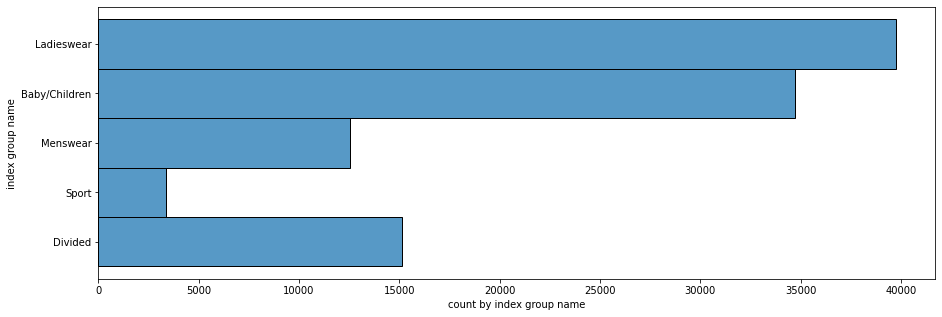

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(data=articles, y='index_group_name')
ax.set_xlabel('count by index group name')
ax.set_ylabel('index group name')
plt.show()

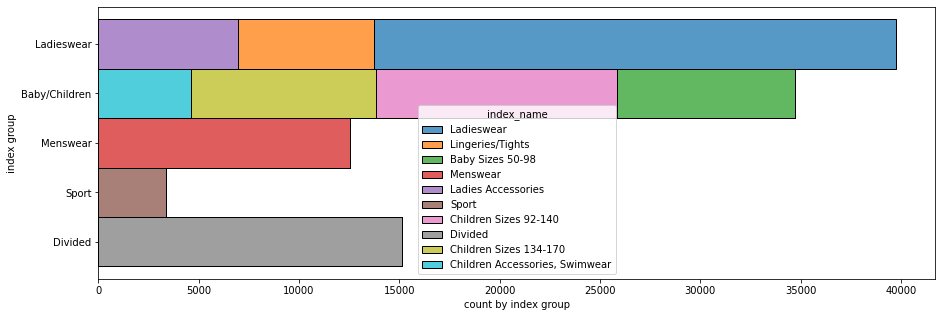

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(data=articles, y='index_group_name', color='orange', hue='index_name', multiple="stack")
ax.set_xlabel('count by index group')
ax.set_ylabel('index group')
plt.show()

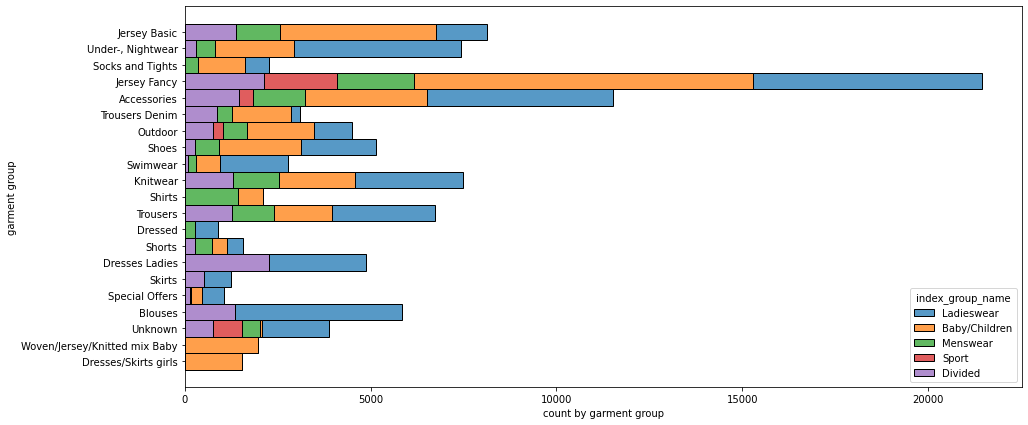

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

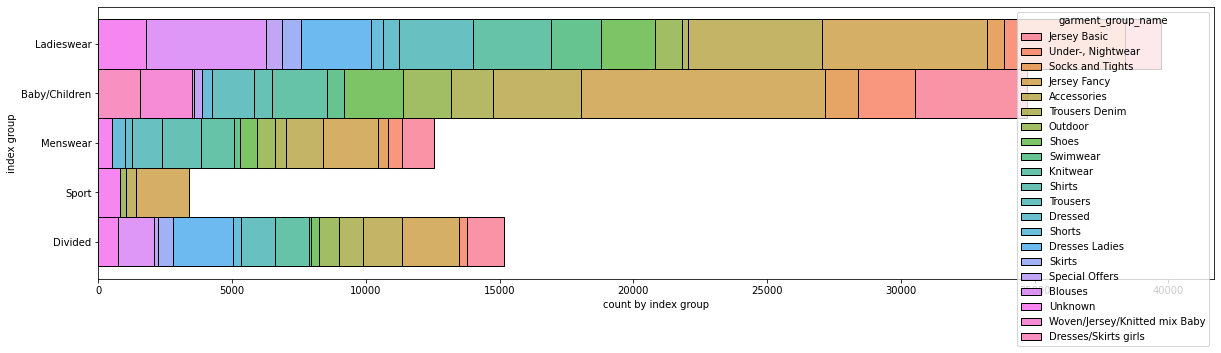

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.histplot(data=articles, y='index_group_name', color='orange', hue='garment_group_name', multiple="stack")
ax.set_xlabel('count by index group')
ax.set_ylabel('index group')
plt.show()

# Customers Data

In [6]:
customers.head(1)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [8]:
grouped_tran = transactions.groupby(by='customer_id').count().reset_index()[['customer_id','article_id']]
grouped_tran.describe()

,article_id
count,1.362281e+06
mean,2.333463e+01
std,3.924225e+01
min,1.000000e+00
25%,3.000000e+00
50%,9.000000e+00
75%,2.700000e+01
max,1.895000e+03


Note that about half of the customers bought more than 10 items, so we can reduce the dimension of customers by keeping only customers who has bought at least 10 articles who have available age, fashion_news_frequency, and club_membership_status. We will then select the first 10000 customers from the resulting table.

In [9]:
grouped_tran = transactions.groupby(by='customer_id').count().reset_index()
filtered_customers = grouped_tran[grouped_tran['article_id']>=10]['customer_id']

filtered_customers_df = customers[customers['customer_id'].isin(filtered_customers)]
filtered_customers_df = filtered_customers_df.dropna(subset = ['age','club_member_status','fashion_news_frequency'])
filtered_customers_df = filtered_customers_df.head(10000)
filtered_customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...
20417,03d5e6dba1eea5a911c8291879edf897fa63ae5c6adc6a...,NaN,NaN,ACTIVE,NONE,49.0,abb6cf3eb0ba7e87f3401d1ad4a199550af3f9c4eba123...
20419,03d600829d6522550a35e4f3c3ba65cec1f14d98f365e3...,NaN,NaN,PRE-CREATE,NONE,53.0,d8d4157cb978507c564b14f19e3cc64ec8d355e43060fa...
20423,03d61862b011833feb1db7d527e5849ec9c83ca9628930...,NaN,NaN,ACTIVE,NONE,24.0,77a6a189927a2a9452815484a5a0d3fca83d54a195a750...
20424,03d650b5b20c51df9c938817b9f5479349dd0ea0fed6a8...,NaN,NaN,ACTIVE,NONE,26.0,3c01591120ef5ca27ae3c69d0bc3274fb66607fa817932...


In [10]:
filtered_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 20428
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   FN                      4004 non-null   float64
 2   Active                  3934 non-null   float64
 3   club_member_status      10000 non-null  object 
 4   fashion_news_frequency  10000 non-null  object 
 5   age                     10000 non-null  float64
 6   postal_code             10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 625.0+ KB


In [13]:
filtered_customers_df.Active.unique()

array([nan,  1.])

In [19]:
active_customers = filtered_customers_df[filtered_customers_df['Active'] == 1]
len(active_customers)

3934

Text(0.5, 1.0, 'Active customers vs Not Active')

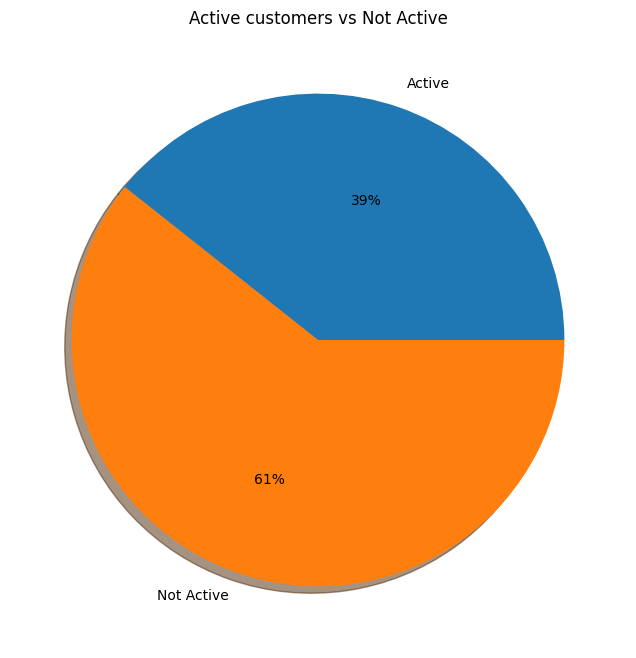

In [22]:
total = len(filtered_customers_df)
plt.figure(figsize=(8, 8))
labels = ['Active', 'Not Active']
size = [len(active_customers) / total, 1 - len(active_customers) / total]
plt.pie(size, labels = labels, shadow=True, autopct='%.0f%%')
plt.title('Active customers vs Not Active')

In [23]:
filtered_customers_df['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', 'Monthly'], dtype=object)

Both 'NONE' and 'None' appeared. We need to unifiy them.

In [24]:
customers = customers.replace("NONE", "None")

In [25]:
# fashion news frequency ('None', 'Regularly'，'Monthly')
grouped_customers = filtered_customers_df.groupby('fashion_news_frequency').count().reset_index()[['fashion_news_frequency','customer_id']]
grouped_customers

,fashion_news_frequency,customer_id
0,Monthly,4
1,NONE,5983
2,Regularly,4013


<Axes: title={'center': 'Number of Customers Over Fashion News Frequency'}, xlabel='fashion_news_frequency'>

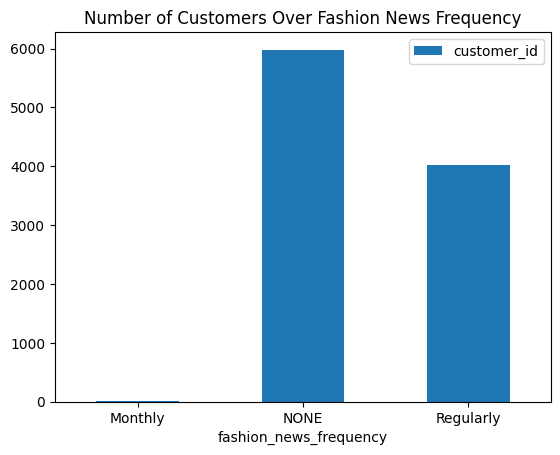

In [26]:
grouped_customers.plot.bar(x='fashion_news_frequency', y='customer_id', rot=0, title='Number of Customers Over Fashion News Frequency')

In [27]:
filtered_customers_df.to_csv("filtered_customer.csv")

# Transactions Data

We also filter transactions to keep only transactions from the filtered customers.

In [28]:
filtered_transactions_df = transactions[transactions['customer_id'].isin(filtered_customers_df['customer_id'])]

In [29]:
filtered_transactions_df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [30]:
total_transactions = len(filtered_transactions_df)
total_transactions

441322

In [31]:
filtered_transactions_df.describe()

,article_id,price,sales_channel_id
count,4.413220e+05,441322.000000,441322.000000
mean,6.983857e+08,0.028030,1.717311
std,1.325236e+08,0.019176,0.450307
min,1.087750e+08,0.000322,1.000000
25%,6.354200e+08,0.016254,1.000000
50%,7.156240e+08,0.025407,2.000000
75%,7.880930e+08,0.033881,2.000000
max,9.495510e+08,0.481441,2.000000


In [32]:
filtered_transactions_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441322 entries, 0 to 31755956
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   t_dat             441322 non-null  object 
 1   customer_id       441322 non-null  object 
 2   article_id        441322 non-null  int64  
 3   price             441322 non-null  float64
 4   sales_channel_id  441322 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 20.2+ MB


We can see that there is no null value in the transactions table. 
Note that sales channels takes only two values (1 and 2). Let's visualize the proportion of each sales channel. 

In [33]:
channel_1_proportion = len(filtered_transactions_df[filtered_transactions_df['sales_channel_id']==1])/total_transactions
channel_2_proportion = len(filtered_transactions_df[filtered_transactions_df['sales_channel_id']==2])/total_transactions

Text(0.5, 1.0, 'Sales Channels')

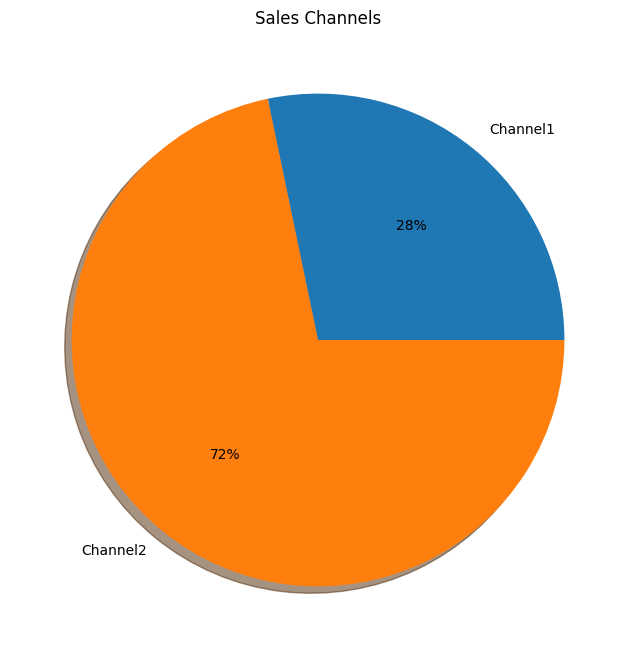

In [34]:
plt.figure(figsize=(8, 8))
labels = ['Channel1', 'Channel2']
channel_1 = transactions[transactions['sales_channel_id']==1]
size = [channel_1_proportion, channel_2_proportion]
plt.pie(size, labels = labels, shadow=True, autopct='%.0f%%')
plt.title('Sales Channels')

We can also see that the transactions are made in a 3-year span from 2018 to 2020, as visualized below.  

In [35]:
# over time
filtered_transactions_df['year']= pd.DatetimeIndex(filtered_transactions_df['t_dat']).year
grouped_transactions = filtered_transactions_df.groupby(by = 'year').count().reset_index()
count_by_year = grouped_transactions[['year','customer_id']].rename(columns = {'customer_id':'count'})
count_by_year 

<ipython-input-35-dd529c430f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions_df['year']= pd.DatetimeIndex(filtered_transactions_df['t_dat']).year


,year,count
0,2018,59199
1,2019,229452
2,2020,152671


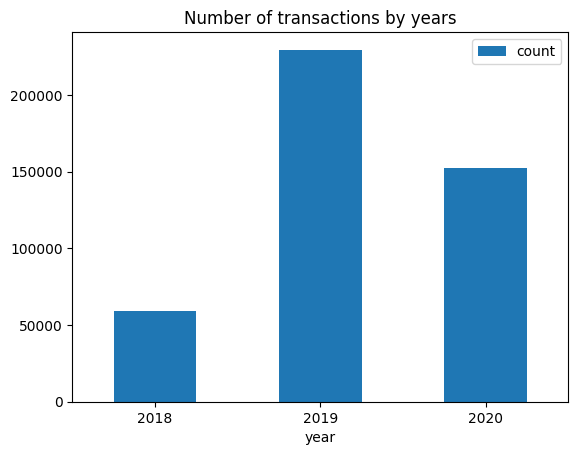

In [36]:
ax = count_by_year.plot.bar(x='year', y='count', rot=0, title='Number of transactions by years')

In [37]:
filtered_transactions_df.to_csv("filtered_transactions.csv")